In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/iris dataset.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

<Axes: xlabel='species', ylabel='count'>

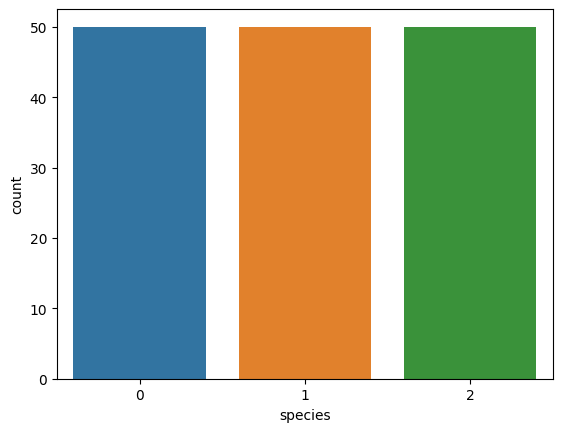

In [ ]:
sns.countplot(data=df,x='species')

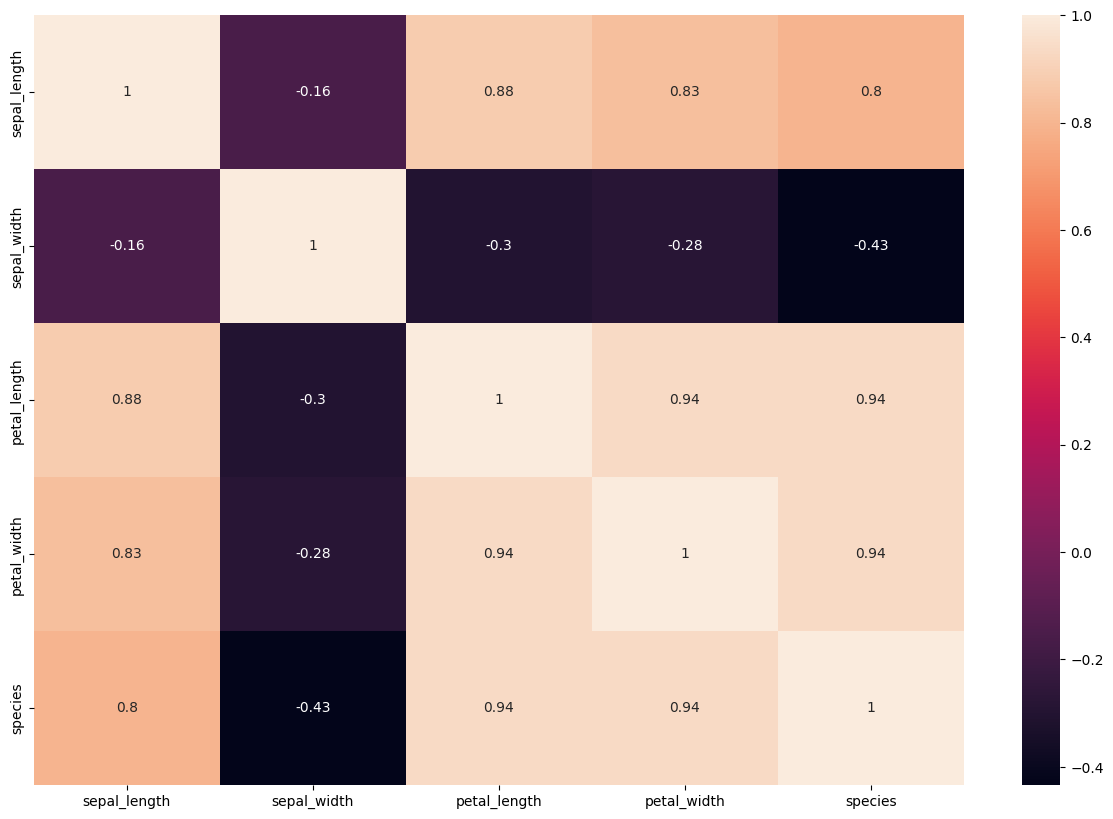

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
X = df.drop(["species"], axis = 1)
y = df["species"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

[]

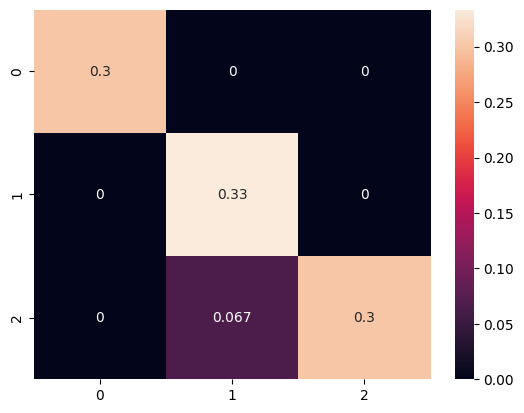

In [ ]:
pred1 = rf.predict(x_test)
cn = confusion_matrix(y_test, pred1)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [ ]:
score = accuracy_score(y_test, pred1)
print('Accuracy:',score)

Accuracy: 0.9333333333333333


In [ ]:
print(classification_report (y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
pred = model.predict(x_test)

[]

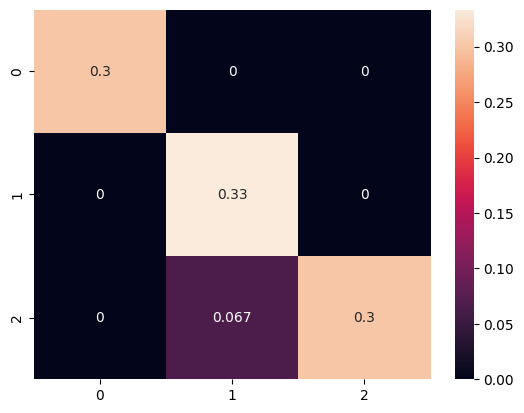

In [ ]:
cn = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [ ]:
score1 = accuracy_score(y_test, pred)
print('Acccuracy: ',score1)

Acccuracy:  0.9333333333333333


In [ ]:
print(classification_report (y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

